# Cardinal planes, Entrance pupil E, Exit pupil E', and CR

## References

<div class="cite2c-biblio"></div>

## Background

The center of perspective of a lens is the center of the entrance pupil <cite data-cite="443206/SSPQRSTQ"></cite>.  This means that the chief-rays from various points in an object plane in focus will (appear to) intersect the optical axis at the center of the entrance pupil. This convergence of rays from a multitude of points in the object plane at the center of the entrance pupil form the vertex of the *projection cone* at the input (object) side.

Since the entrance pupil, the limiting aperture and the exit pupil are images of each other <cite data-cite="443206/DQBJD4RQ"></cite>, the chief rays also intersect the optical axis at the center of the limiting aperture (physically), and then (appear to) intersect the optical axis at the center of exit pupil before forming the image. Thus, like it's counterpart in the object side, the center of the exit pupil forms the vertex of the projection cone at the output (image) side. In other words, the center of the exit pupil is the center of projection of the image. 

First we will study, using geometric optics, the center of perspective projection of a lens, and of the image, and the consequences of rotating a lens about a point away from or coinciding with the center of projection. We will study the entrance pupil and exit pupil for two lenses -- a Double Gauss 28 degrees FOV lens (representative of real lenses) and a lens created using paraxial surfaces (ideal lens) to understand the role of aberrations.

In [1]:
# imports
from __future__ import print_function, division
import os as os
import numpy as np
import matplotlib.pyplot as plt
from IPython.core import display
from geometric_model_zemax_commons import * 
import pyzdde.zdde as pyz

In [2]:
%matplotlib inline

Helper functions

In [3]:
# create "image" directory if not present
cdir = os.getcwd()
imgdir = os.path.join(cdir, 'images')
if not os.path.exists(imgdir):
    os.makedirs(imgdir)
    print("Created 'images' directory")
    
# Helper function for saving figures
bSaveFigure = False
fig_format, fig_ext = 'png', '.png'
def saveFigure(figure, fig_name, DPI=200):
    if bSaveFigure:
        figname = os.path.join(imgdir, fig_name)
        figure.savefig(figname, dpi=DPI, facecolor='white', edgecolor='white',
                       bbox_inches='tight', format=fig_format, pad_inches=0.03)

Create a pyzdde object to communicate with Zemax.

In [4]:
ln = pyz.createLink()
# Location of the Zemax lens files for this notebook
zmxdir = os.path.join(cdir, 'zmxfiles')

## Entrance and exit pupil as center of projections for a non-ideal lens

Our first lens to try is the Double Gauss 28 degrees FOV, which is shipped with Zemax. It is an example of a non-ideal lens (i.e. it has some amount of aberration). After loading the lens into Zemax, the function ``draw_pupil_cardinal_planes()`` is called. The function inserts the pupil planes and cardianl planes into the LDE and outputs the same information as text. 

#### Double Gauss lens focused at infinity

The function `draw_pupil_cardinal_planes()` draws the cardinal planes and the entrance and exit pupils as surfaces in the Lens Data Editor (LDE). In addition to drawing the surfaces, the function also displays information about the location of the planes.

In [5]:
lens = "DGauss28deg_pm5degfields_infiniteConj.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)
draw_pupil_cardinal_planes(ln, firstDummySurfOff=40, push=True)

Exit pupil distance from IMG: -108.123923
Entrance pupil from Surf 1 @ LDE: 99.00145359
Focal plane obj from surf 1 @ LDE:  7.572935 
Focal plane img from IMA:  0.169759
Principal plane obj from surf 1 @ LDE:  107.07736 
Principal plane img from IMA:  -99.334666
Focal length:  99.50442486
Principal plane H to ENPP:  8.07590641
Principal plane H' to EXPP:  8.789257
Principal plane H' to EXPP (absolute distance) calculated using lens equation:  8.7892534646
Principal plane H' to rear focal plane:  99.504425
Principal plane H to front focal plane:  -99.504425


Following the steps 1-5 listed above (changes were made in the LDE), the lens file was saved (manually from the LDE) as "DGauss28deg_pm5degfields_infiniteConj_cardinalsDrawn.zmx"

In [6]:
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "DGauss28deg_pm5degfields_infiniteConj_cardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()

In [7]:
#ln.zGetRefresh()
#lay_arr_marginal = ln.ipzCaptureWindow('Lay', percent=20, gamma=0.12, retArr=True)

In [8]:
lay_arr_chief = ln.ipzCaptureWindow('Lay', percent=20, gamma=0.09, retArr=True)

The layout plot after combining the two images 

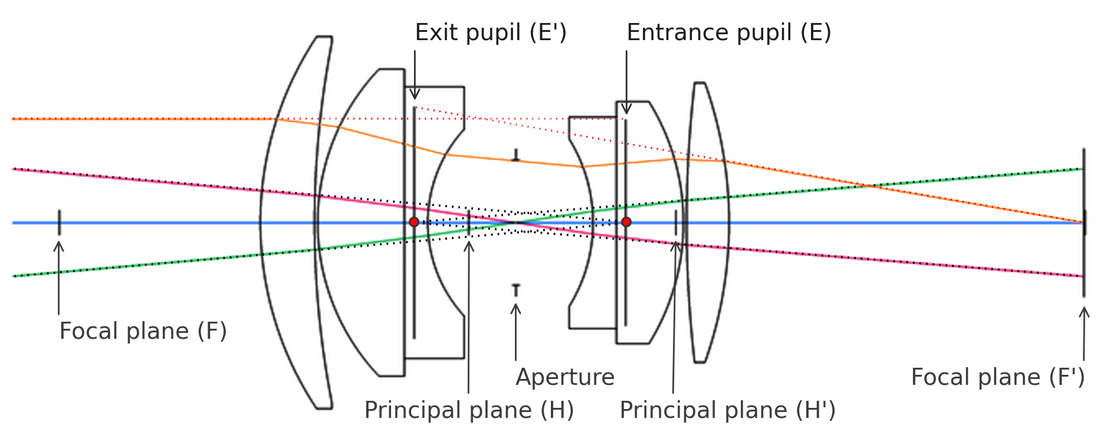

In [157]:
display.Image('images\marginalandchiefraycombined.png', width=700)

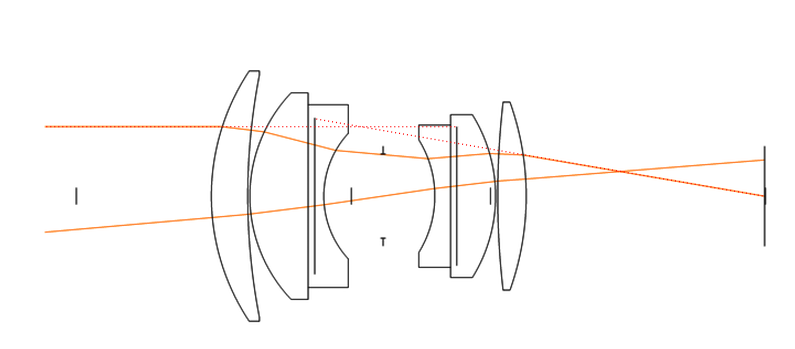

In [149]:
# Commenting out the code so that it is not executed 
#fig = plt.figure(figsize=(14, 8), dpi=200)
#ax = fig.add_subplot(111)
#pyz.imshow(lay_arr_marginal, cropBorderPixels=(2, 15, 100, 140), fig=fig, faxes=ax)
#ax.plot([280, 686], [101.3, 171.3], ls='dotted', color='r')
#ax.plot([35, 409], [108.2, 108.3], ls='dotted', color='r')
## Save the figure
#saveFigure(fig, '00_marginal_ChiefRays_DGauss28_infiConj.png')
#plt.show()

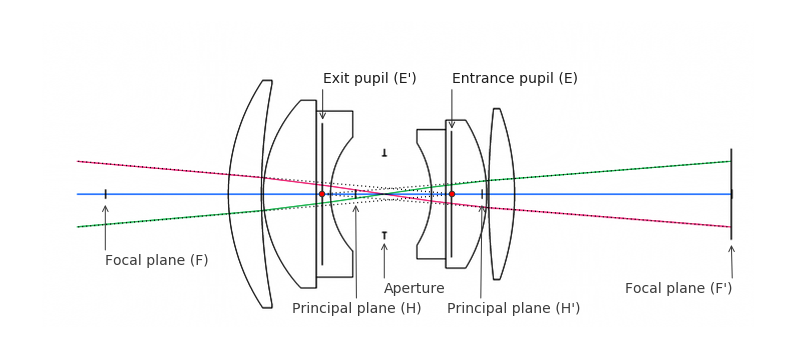

In [9]:
fig = plt.figure(figsize=(14, 8), dpi=200)

ax = fig.add_subplot(111)

pyz.imshow(lay_arr_chief, cropBorderPixels=(2, 15, 100, 140), fig=fig, faxes=ax)


#ax.annotate('text', (arrowHead.x, arrowHead.y), (textPos.x, textPos.y)) ....)
arrCol =  '#3A3A3A'   
cadTxtCol = '#3A3A3A'    
pupTxtCol = '#1B1B1B'   
pupArrCol = '#2B2B2B'   

ax.annotate("Focal plane (F)", (62, 180), (62, 242), fontsize=14, color=cadTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0,0.5), color=arrCol))
ax.annotate("Focal plane (F')", (687, 220), (581, 270), fontsize=14, color=cadTxtCol,  
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(1.0,0.0), color=arrCol))

ax.annotate("Entrance pupil (E)", (408, 108), (408, 60), fontsize=14, color=pupTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0.0,1.0), color=pupArrCol))
ax.annotate("Exit pupil (E')", (279, 99), (279, 60), fontsize=14, color=pupTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0.0,1.0), color=pupArrCol))

ax.annotate("Principal plane (H)", (312, 180), (248, 290), fontsize=14, color=cadTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0.5,1.0), color=arrCol))
ax.annotate("Principal plane (H')", (438, 180), (403.5, 290), fontsize=14, color=cadTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0.25,1.0), color=arrCol))

ax.annotate("Aperture", (340.5, 218), (340.5, 270), fontsize=14, color=cadTxtCol, 
            arrowprops=dict(arrowstyle="->", linewidth=1, relpos=(0.0,1.0), color=arrCol))

#ax.plot([x1, x2], [y1, y2], ls='dotted', color='k')
ax.plot([280, 685], [171, 138.5], ls='dotted', color='k')
ax.plot([280, 685], [171.5, 204], ls='dotted', color='k')
ax.plot([35, 409],[138.5, 171], ls='dotted', color='k')
ax.plot([35, 409],[204, 171.5], ls='dotted', color='k')

# points of intersection
ax.scatter([408, 278.5], [171, 171], s=30, c='r', lw=1, zorder=20)

# Save the figure
saveFigure(fig, '00_centerOfProj_ObjAndImgSide_DGauss28_infiConj.png')

plt.show()

It can be seen from the above figure, that the rays exiting the last surface when extended backwards towards the optical axis does not meet at the center of the exit pupil. The rays that are symmetric about the optical axis meet at points along the optical axis, and it seems that the divergence of the point of intersection of these rays from the exit pupil increases with increase in the off-axis angle. Although, the point of intersection of the input rays is not clear from the above figure (because we can only see very small portions of each incoming ray before the first lens surface) they all do meet at the center of the entrance pupil, as it is shown next. 

Now in order to inspect the scenario when the lens is focused at a finite distance, we will use the same lens to image at finite conjugates, focusing at 500 mm from the first glass surface.

In [10]:
ln.close()

In [9]:
lens = "Double Gauss 28 degree field.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)
OBJ, thickness, thickVal = 0, 3, 500
ln.zSetSurfaceData(OBJ, thickness, thickVal)
ln.zQuickFocus()
ln.zPushLens(1)
# Visually ensure that the starting point is as expected.

0

In [10]:
draw_pupil_cardianl_planes(ln, 0)

Exit pupil distance from IMG: -128.4303967
Entrance pupil from Surf 1: 59.00145359
Focal plane obj:  -32.427065 
Focal plane img:  -20.136715
Principal plane obj:  67.07736 
Principal plane img:  -119.64114
Focal length:  99.50442486
Principal plane H to ENPP:  8.07590641
Principal plane H' to EXPP:  8.7892567
Principal plane H' to EXPP (absolute distance) calculated using lens equation:  8.7892534646
Principal plane H to rear focal plane:  99.504425
Principal plane H' to front focal plane:  -99.504425


In [12]:
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "Double Gauss 28 degree field_CardinalsDrawn_focusedAtFinite.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()
lay_arr = ln.ipzCaptureWindow('Lay', percent=50, gamma=0.32, retArr=True)

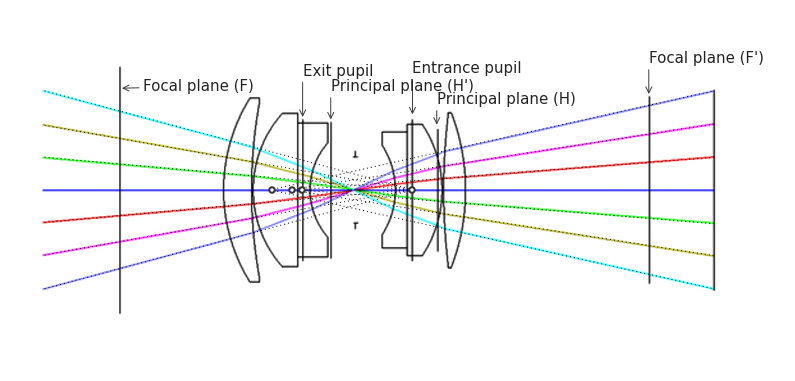

In [13]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

pyz.imshow(lay_arr, cropBorderPixels=(1200, 60, 550, 550), fig=fig, faxes=ax)

ax.annotate("Focal plane (F)", (60, 50), (78, 52), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.5,0.5)))
ax.annotate("Focal plane (F')", (474, 56), (474, 30), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Entrance pupil", (289, 72), (289, 38), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Exit pupil", (203, 74), (203, 40), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Principal plane (H)", (308, 80), (308, 62), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Principal plane (H')", (225, 76), (225, 52), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))

# lines for incoming rays
ax.plot([1, 291],[52, 130], ls='dotted', color='k', lw=1)
ax.plot([1, 291],[207, 129], ls='dotted', color='k', lw=1)
ax.plot([1, 291],[79, 130], ls='dotted', color='k', lw=1)
ax.plot([1, 291],[180.5, 129], ls='dotted', color='k', lw=1)
ax.plot([1, 291],[104, 130], ls='dotted', color='k', lw=1)
ax.plot([1, 291],[155, 129], ls='dotted', color='k', lw=1)

# point of intersection
ax.scatter([289,], [130,], s=30, c='w', lw=2, zorder=20)

#ax.plot([1, 291],[52, 130],  color='#34FFFF', lw=1)
#ax.plot([1, 291],[207, 129],  color='#8383FF', lw=1)
#ax.plot([1, 291],[79, 130],  color='r', lw=1)
#ax.plot([1, 291],[180.5, 129],  color='k', lw=1)
#ax.plot([1, 291],[104, 130],  color='k', lw=1)
#ax.plot([1, 291],[155, 129], color='k', lw=1)

# lines for exiting rays
ax.plot([180, 525],[129, 52], ls='dotted', color='k', lw=1)
ax.plot([180, 525],[130, 207], ls='dotted', color='k', lw=1)
ax.plot([196, 525],[129, 78], ls='dotted', color='k', lw=1)
ax.plot([196, 525],[130, 181], ls='dotted', color='k', lw=1)
ax.plot([206, 525],[129, 104], ls='dotted', color='k', lw=1)
ax.plot([206, 525],[130, 156], ls='dotted', color='k', lw=1)

# points of intersection
ax.scatter([179, 195, 202.5], [130, 130, 130], s=30, c='w', lw=2, zorder=20)

#ax.plot([180, 525],[129, 52],  color='#8383FF', lw=1)
#ax.plot([180, 525],[130, 207], color='#34FFFF', lw=1)
#ax.plot([196, 525],[129, 78], color='#FF34FF', lw=1)
#ax.plot([196, 525],[130, 181], color='#BDBD46', lw=1)
#ax.plot([206, 525],[129, 104], color='#FF2222', lw=1)
#ax.plot([206, 525],[130, 156], color='#57FF57', lw=1)


# Save figure, if turned on
saveFigure(fig, fig_name = 'cop_and_image_projection_cone_reallens', DPI=200)

plt.show()

From the above figure we see that as before the extension of the rays to the image plane does not insersect at a common point. However, the incoming rays do appear to meet at the center of the entrance pupil. 

The most likely reason for the exiting rays not meeting at the center of the exit pupil is the presence of aberration in the lens that deviates the chief-rays from the non-aberrated path.

In order to confirm this suspicion, we will examine a lens system with no aberrations -- in which the surfaces are paraxial surfaces.

#### For the paraxial lens

In [14]:
lens = "paraxialDoubleLens2.zmx"
lensPath = os.path.join(zmxdir, lens)
ln.zLoadFile(lensPath)
draw_pupil_cardianl_planes(ln, 40)

Exit pupil distance from IMG: -52.29967208
Entrance pupil from Surf 1: 14.48275862
Focal plane obj:  -17.311828 
Focal plane img:  -7.752821
Principal plane obj:  20.322581 
Principal plane img:  -45.38723
Focal length:  37.6344086
Principal plane H to ENPP:  5.83982238
Principal plane H' to EXPP:  6.91244208
Principal plane H' to EXPP (absolute distance) calculated using lens equation:  6.91244289451
Principal plane H to rear focal plane:  37.634409
Principal plane H' to front focal plane:  -37.634409


In [15]:
# For drawing the figure, we can use a stored copy in order to avoid
# manually changing surface properties in the LDE
loadStoredCopy = True
if loadStoredCopy:
    storedLens = "paraxialDoubleLens2_CardinalsDrawn.zmx"
    storedLensPath = os.path.join(zmxdir, storedLens)
    ln.zLoadFile(storedLensPath)
else:
    ln.zGetRefresh()
lay_arr = ln.ipzCaptureWindow('Lay', percent=60, gamma=0.5, retArr=True)

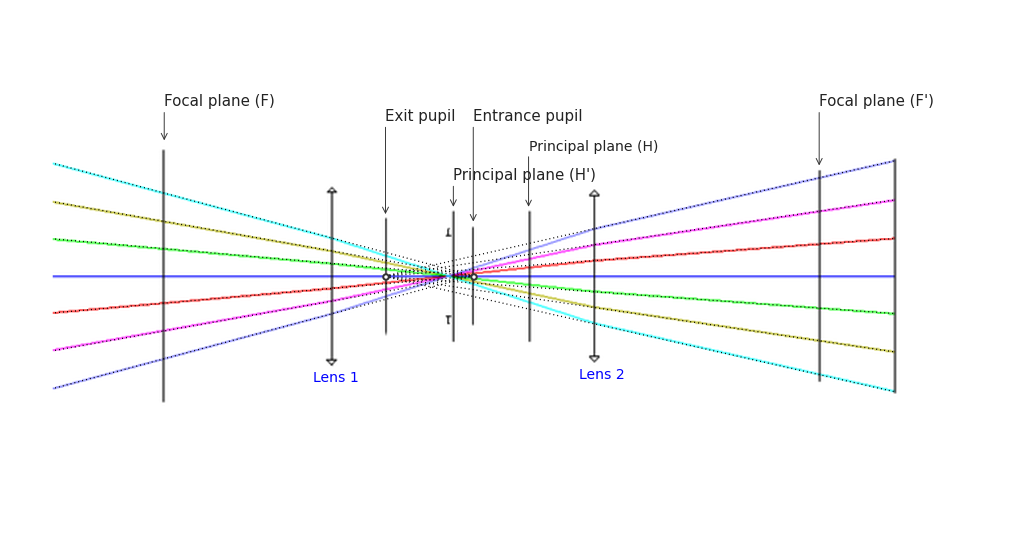

In [16]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
pyz.imshow(lay_arr, cropBorderPixels=(1500, 60, 650, 650), fig=fig, faxes=ax)
ax.annotate("Focal plane (F)", (75, 75), (75, 50), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Focal plane (F')", (519, 92), (519, 50), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Entrance pupil", (284.5, 130), (284.5, 60), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Exit pupil", (225, 125), (225, 60), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Principal plane (H)", (322, 120), (322, 80), fontsize=14, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.annotate("Principal plane (H')", (271, 120), (271, 100), fontsize=15, color='#222222', 
            arrowprops=dict(arrowstyle="->", linewidth=0.95, relpos=(0.0,1.0)))
ax.text(176, 237, 'Lens 1', fontsize=14, color='blue')
ax.text(356, 235, 'Lens 2', fontsize=14, color='blue')

# lines for incoming rays
ax.plot([1, 284.5],[89.5, 165.5], ls='dotted', color='k')
ax.plot([1, 284.5],[241.5, 165.5], ls='dotted', color='k')
ax.plot([1, 284.5],[115.5, 165.5], ls='dotted', color='k')
ax.plot([1, 284.5],[216, 165.5], ls='dotted', color='k')
ax.plot([1, 284.5],[140.5, 165.5], ls='dotted', color='k')
ax.plot([1, 284.5],[190.5, 165.5], ls='dotted', color='k')

# points of intersection
ax.scatter([285,], [166,], s=30, c='w', lw=2, zorder=20)

# lines for outgoing rays
ax.plot([225, 570],[165.5, 87.5], ls='dotted', color='k')
ax.plot([225, 570],[166, 244], ls='dotted', color='k')
ax.plot([225, 570],[165.5, 114], ls='dotted', color='k')
ax.plot([225, 570],[166, 217], ls='dotted', color='k')
ax.plot([225, 570],[165.5, 140.2], ls='dotted', color='k')
ax.plot([225, 570],[166, 191], ls='dotted', color='k')

# point of intersection
ax.scatter([225.5,], [166,], s=30, c='w', lw=2, zorder=20)

# Save figure, if turned on
saveFigure(fig, fig_name = 'cop_and_image_projection_cone_aberrationFreelens', DPI=200)

plt.show()

As the above figure shows, the exit pupil is the center of projection of the image.

In [7]:
ln.close()